In [606]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors

from sklearn.ensemble import RandomForestClassifier


In [607]:
df_train = pd.read_csv('train.csv')

# Set max_columns to None to display all columns
pd.options.display.max_columns = None

df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [608]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [609]:
df_submission = pd.read_csv('gender_submission.csv')
df_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [610]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [611]:
sum(df_train.duplicated())

0

In [612]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [613]:
df_train.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [614]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_histogram(data, log_scale: bool, ignore_features, cols):
    colors = list(mcolors.CSS4_COLORS.keys())[10:]
    fig = plt.figure(figsize=(20,20))
    
    for i, feature in enumerate(data.columns):
        if feature not in ignore_features:
            f = fig.add_subplot(8, cols, i + 1)
            data[feature].hist(bins = 20, ax = f, facecolor = colors[i])
            f.set_title(feature + " Histogram", color = colors[35])
            if log_scale:
                f.set_yscale('log')   
    fig.tight_layout()
    plt.show()



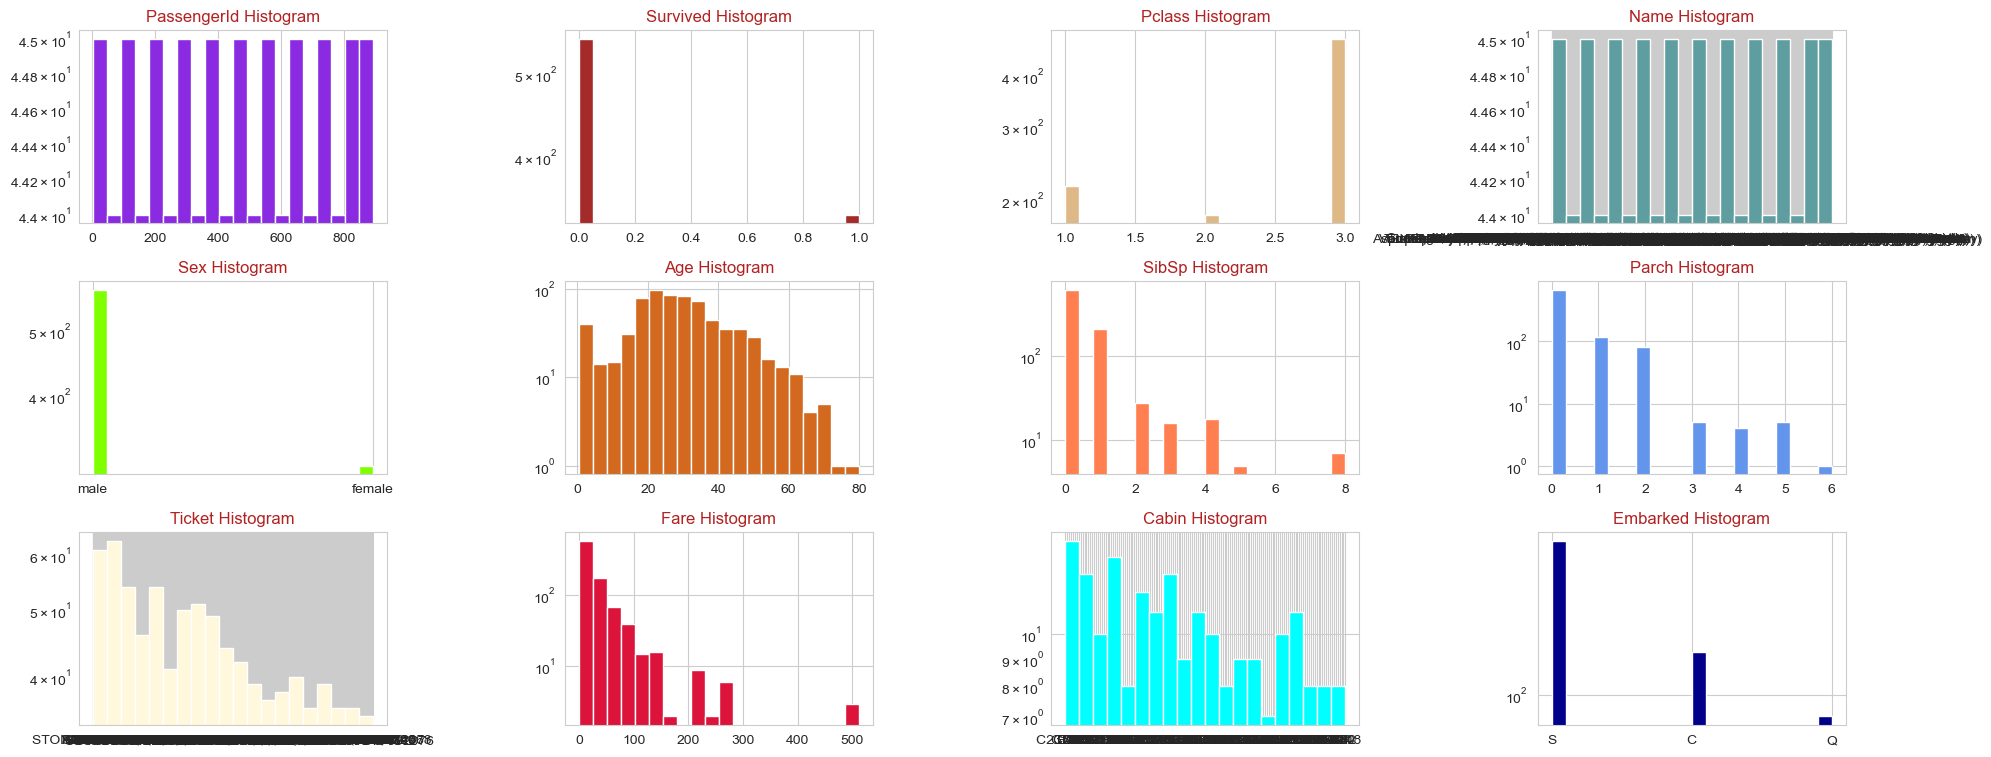

In [615]:
get_histogram(data = df_train,log_scale = True, ignore_features=[], cols=4)

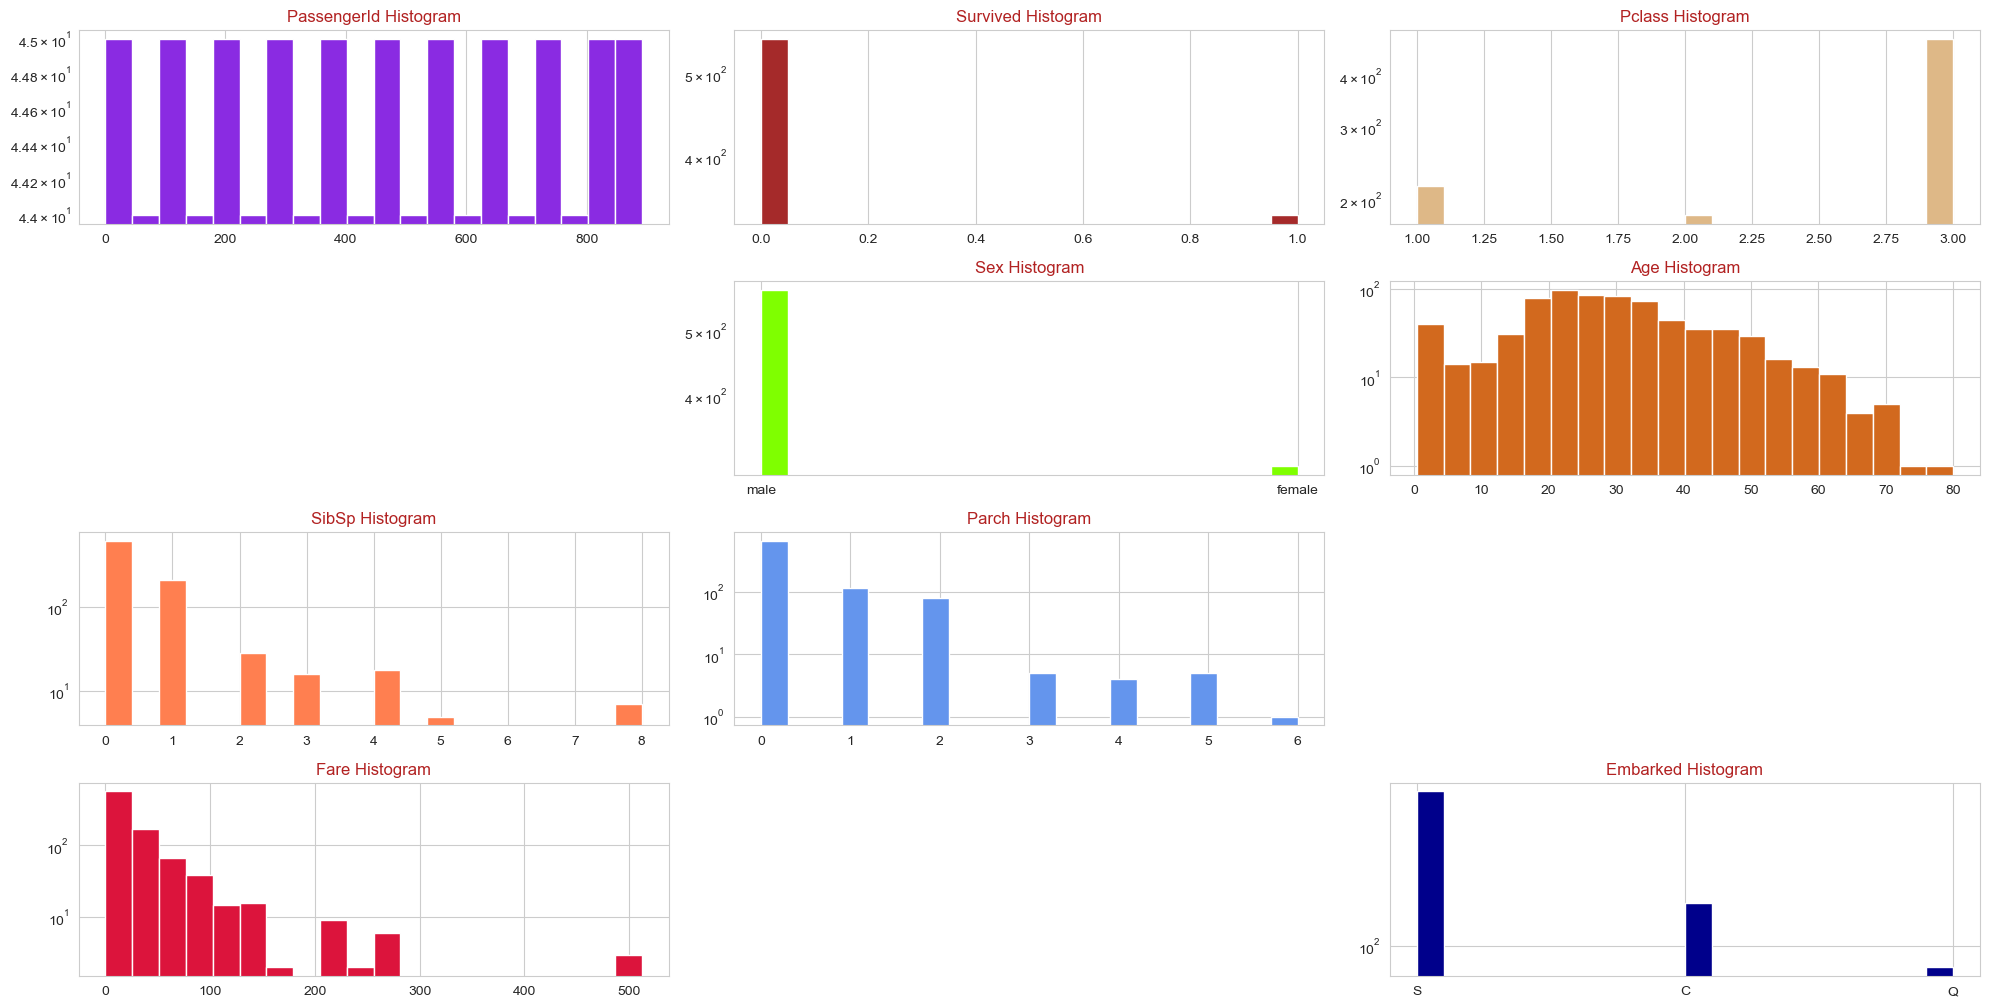

In [616]:
get_histogram(data = df_train,log_scale = True, ignore_features=('Name','Ticket','Cabin'), cols = 3)

In [617]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

def split_and_train(X_train, y_train, X_test, y_test, scale : bool, ml_model = None,  mode = "auto"):
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12, stratify=y)
    
    X_train_scaled = X_train
    X_test_scaled = X_test
      
    if scale:  
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
        X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    
 
    if ml_model == "RandomForestClassifier":
        model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    elif ml_model == "DecisionTreeClassifier":
        model = DecisionTreeClassifier(max_depth=2)
    else:
        model = LogisticRegression(multi_class=mode);
    model.fit(X_train_scaled, y_train)
    train_accuracy = model.score(X_train_scaled, y_train)
    print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
    test_accuracy = model.score(X_test_scaled, y_test)
    print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%\n')
    
    return model, X_test_scaled, y_test

In [618]:
def visualilize_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Purples', fmt='d')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

In [619]:
def heat_map(data):
    plt.figure(figsize = (38, 16))
    sns.heatmap(data.corr(), annot = True)
    plt.show()

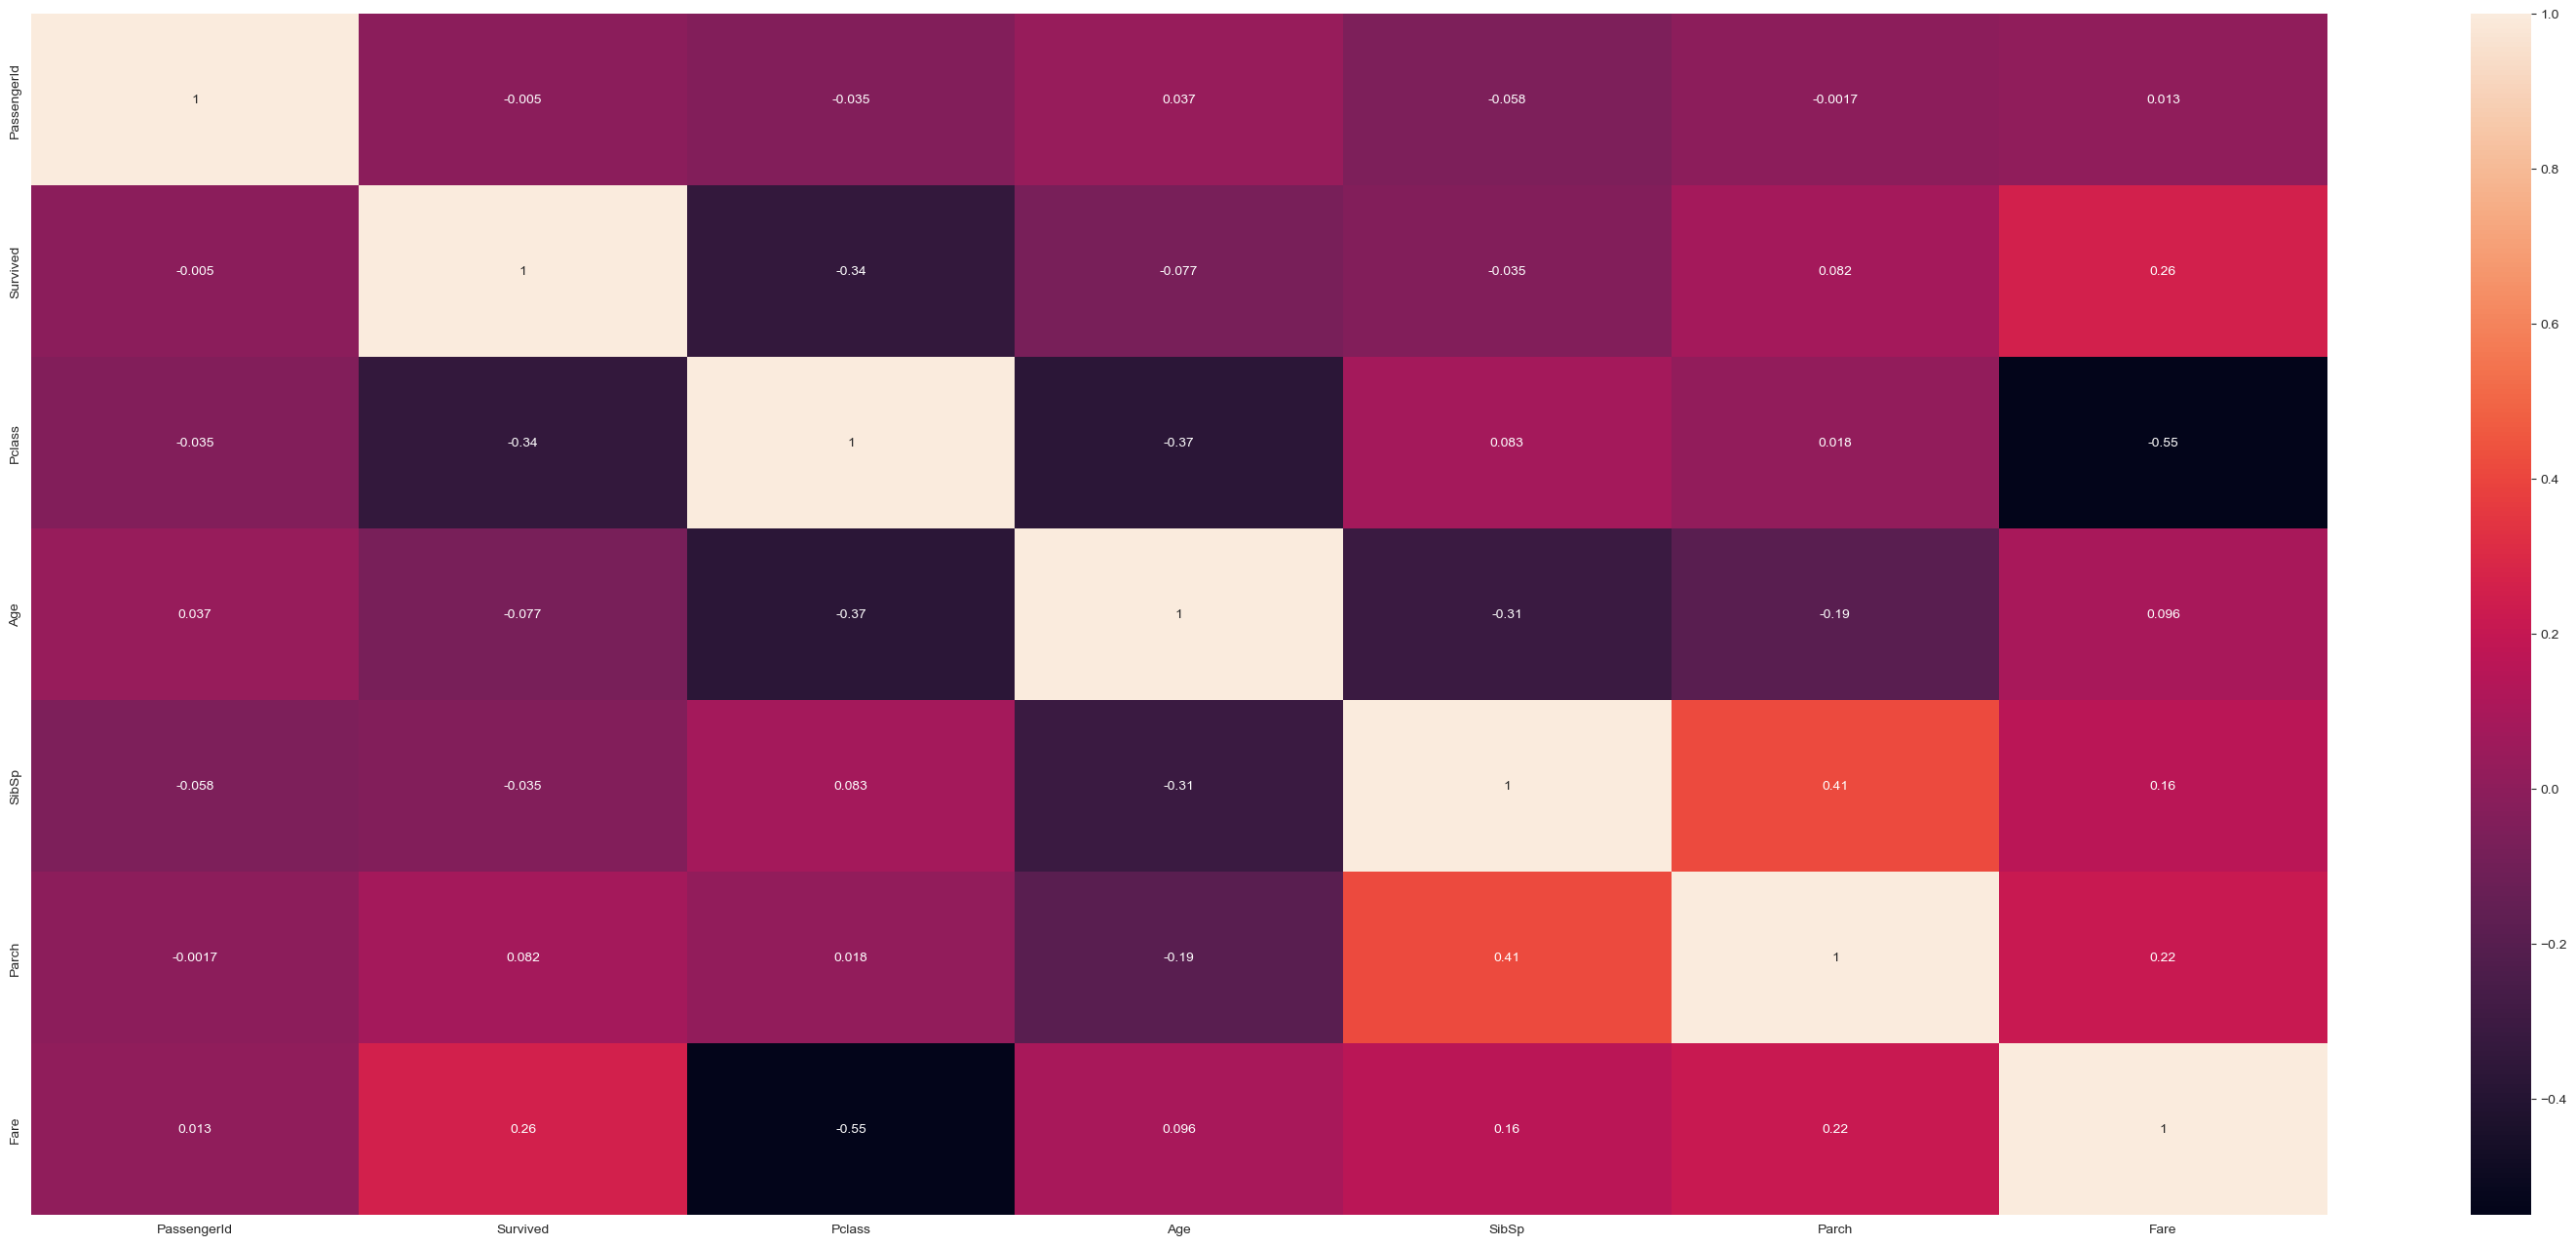

In [620]:
heat_map(df_train)

In [621]:
df_test = pd.merge(df_test, df_submission, how='left', on='PassengerId')

In [622]:
df_train_1 =df_train.select_dtypes(exclude=['object'])
df_test_1 =df_test.select_dtypes(exclude=['object'])



In [623]:
df_train_1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [624]:
df_train_1['Age'].fillna(100, inplace=True)
df_test_1['Age'].fillna(100, inplace=True)

In [625]:
y_train_1 = df_train_1['Survived'];
X_train_1 = df_train_1.iloc[:, df_train_1.columns != 'Survived']

X_train_1.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [626]:
df_test_1

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,892,3,34.5,0,0,7.8292,0
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,0
3,895,3,27.0,0,0,8.6625,0
4,896,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,1305,3,100.0,0,0,8.0500,0
414,1306,1,39.0,0,0,108.9000,1
415,1307,3,38.5,0,0,7.2500,0
416,1308,3,100.0,0,0,8.0500,0


In [627]:
y_test_1 = df_train_1['Survived'];
X_test_1 = df_train_1.iloc[:, df_train_1.columns != 'Survived']

The accuracy for the training set is 70.26%
The accuracy for the test set is 70.26%

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       549
           1       0.67      0.44      0.53       342

    accuracy                           0.70       891
   macro avg       0.69      0.65      0.66       891
weighted avg       0.70      0.70      0.69       891



c:\Users\zawsz\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


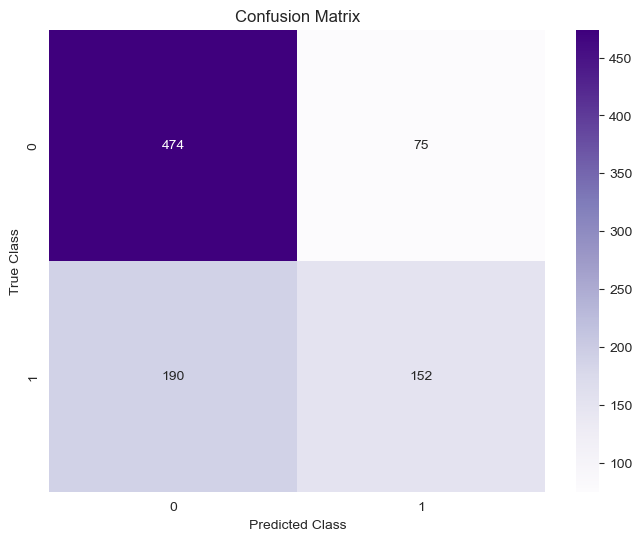

In [628]:
model, X_test_scaled, y_test = split_and_train(X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1, scale=False)

y_pred = model.predict(X_test_scaled)

test_report = classification_report(y_test, y_pred)
print(test_report)

visualilize_confusion_matrix(y_test,y_pred)

The accuracy for the training set is 70.48%
The accuracy for the test set is 70.48%

              precision    recall  f1-score   support

           0       0.72      0.86      0.78       549
           1       0.67      0.45      0.54       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



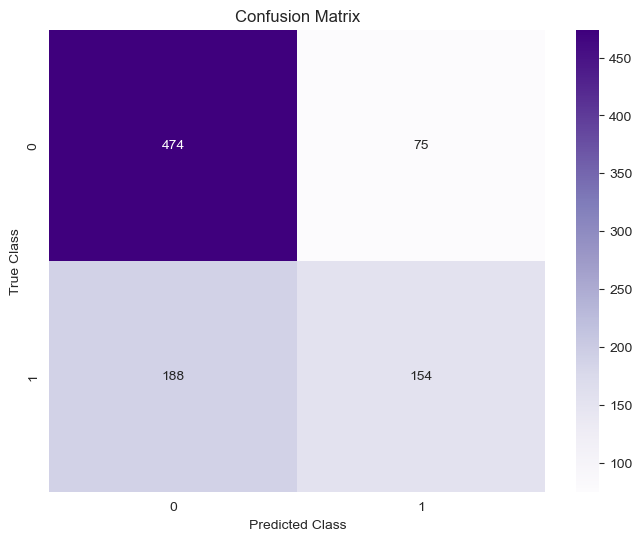

In [629]:
model_1, X_test_scaled_1, y_test_1 = split_and_train(X_train=X_train_1, y_train=y_train_1, X_test=X_test_1, y_test=y_test_1, scale=True)

y_pred_1 = model_1.predict(X_test_scaled_1)

test_report_1 = classification_report(y_test_1, y_pred_1)
test_report_1_dict = classification_report(y_test_1, y_pred_1, output_dict=True)

print(test_report_1)

visualilize_confusion_matrix(y_test_1,y_pred_1)

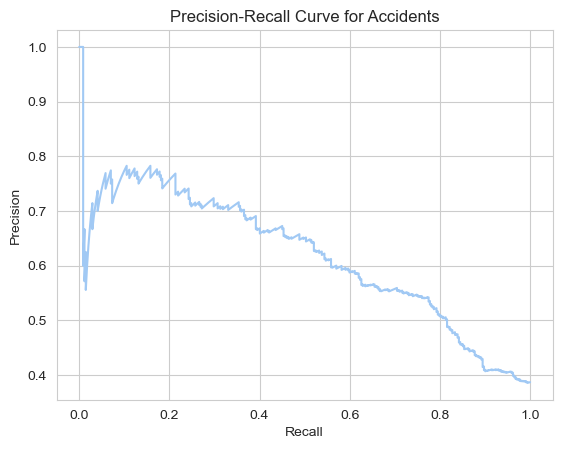

In [630]:
# Get predicted probabilities of class 1
y_pred_prob_1 = model_1.predict_proba(X_test_scaled_1)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob_1)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()

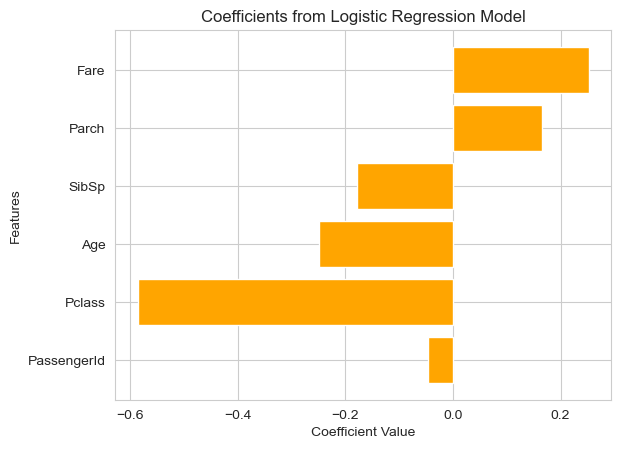

In [631]:
# Get coefficients of the model
feature_importances = model_1.coef_[0]

# Plot coefficients of the model
plt.barh(X_test_scaled_1.columns, feature_importances, color ='Orange' )

# Plot the coefficients
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients from Logistic Regression Model')
plt.show()

# Encode with one-hot instead of dropping object 

In [632]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [633]:
# Import libraries
from sklearn.preprocessing import LabelEncoder

df_train_2 = df_train.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)

df_test_2 = df_test.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)


df_train_2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [634]:
df_train_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [635]:
df_train_2['Age'].fillna(100, inplace=True)
df_test_2['Age'].fillna(100, inplace=True)

The accuracy for the training set is 80.81%
The accuracy for the test set is 80.81%

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.69      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.81      0.81      0.81       891



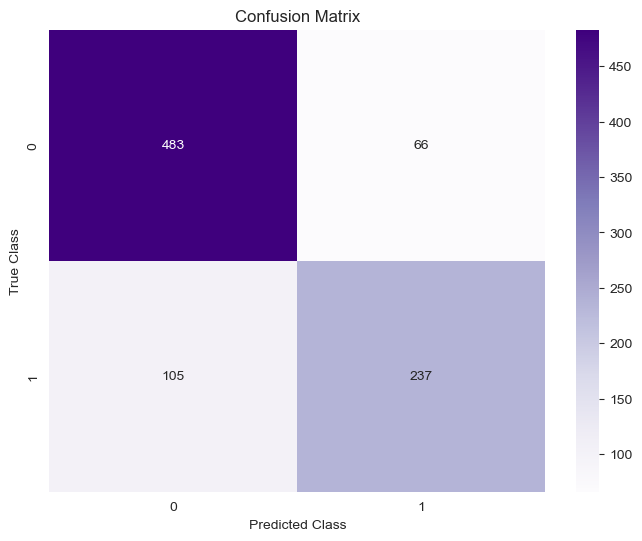

In [636]:
y_train_2 = df_train_2['Survived'];
X_train_2 = df_train_2.iloc[:, df_train_2.columns != 'Survived']

y_test_2 = df_train_2['Survived'];
X_test_2 = df_train_2.iloc[:, df_train_2.columns != 'Survived']

model_2, X_test_scaled_2, y_test_2 = split_and_train(X_train=X_train_2, y_train=y_train_2, X_test=X_test_2, y_test=y_test_2, scale=True)

y_pred_2 = model_2.predict(X_test_scaled_2)

test_report_2 = classification_report(y_test_2, y_pred_2)
test_report_2_dict = classification_report(y_test_2, y_pred_2, output_dict=True)
print(test_report_2)

visualilize_confusion_matrix(y_test_2,y_pred_2)

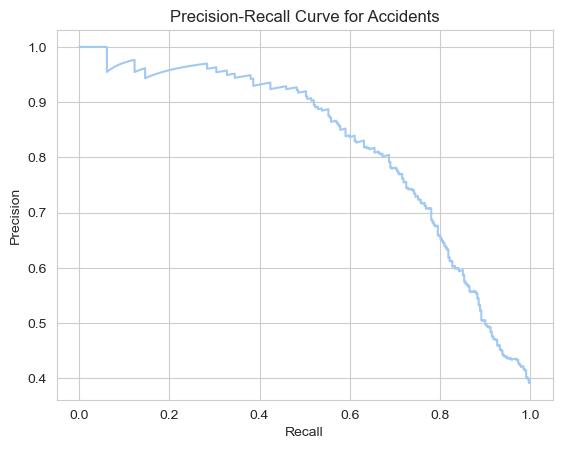

In [637]:
y_pred_prob_2 = model_2.predict_proba(X_test_scaled_2)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_2, y_pred_prob_2)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()

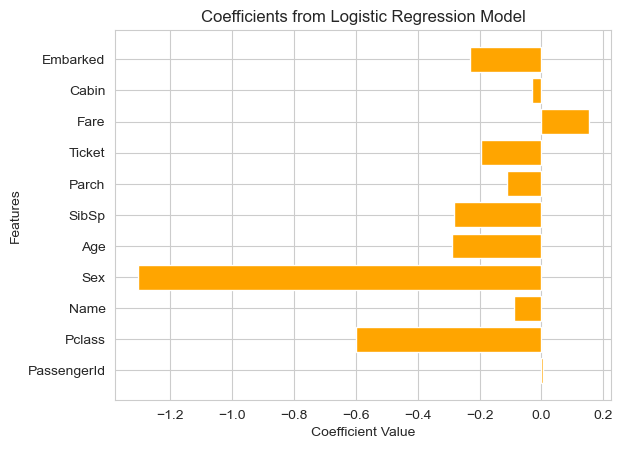

In [638]:
# Get coefficients of the model
feature_importances = model_2.coef_[0]

# Plot coefficients of the model
plt.barh(X_test_scaled_2.columns, feature_importances, color ='Orange' )

# Plot the coefficients
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients from Logistic Regression Model')
plt.show()

# Drop irrelevant Columns + transform 

In [639]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [640]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [641]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [642]:
df_train_3 = df_train.drop(['Name','PassengerId', 'Ticket'], axis=1)
df_test_3 = df_test.drop(['Name','PassengerId', 'Ticket'], axis=1)

In [643]:
df_train_3.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [644]:
df_train_3['Age'].fillna(100, inplace=True)
df_test_3['Age'].fillna(100, inplace=True)

df_train_3['Cabin'].fillna('A', inplace=True)
df_test_3['Cabin'].fillna('A', inplace=True)

df_train_3['Embarked'].fillna('Z', inplace=True)
df_test_3['Embarked'].fillna('Z', inplace=True)

df_train_3.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [645]:
df_train_3 = df_train_3.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)

df_test_3 = df_train_3.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)

The accuracy for the training set is 79.91%
The accuracy for the test set is 79.91%

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.75      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



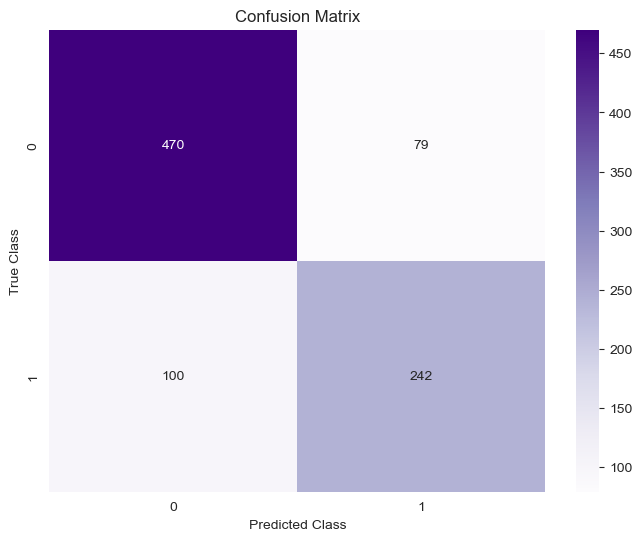

In [646]:
y_train_3 = df_train_3['Survived'];
X_train_3 = df_train_3.iloc[:, df_train_3.columns != 'Survived']

y_test_3 = df_train_3['Survived'];
X_test_3 = df_train_3.iloc[:, df_train_3.columns != 'Survived']

model_3, X_test_scaled_3, y_test_3 = split_and_train(X_train=X_train_3, y_train=y_train_3, X_test=X_test_3, y_test=y_test_3, scale=True)

y_pred_3 = model_3.predict(X_test_scaled_3)

test_report_3 = classification_report(y_test_3, y_pred_3)
test_report_3_dict =classification_report(y_test_3, y_pred_3, output_dict=True)
print(test_report_3)

visualilize_confusion_matrix(y_test_3,y_pred_3)

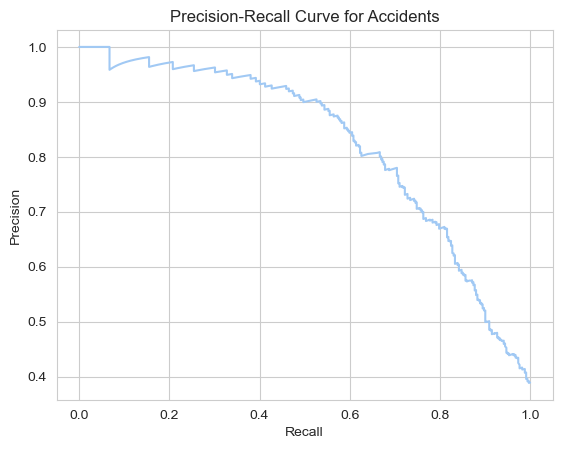

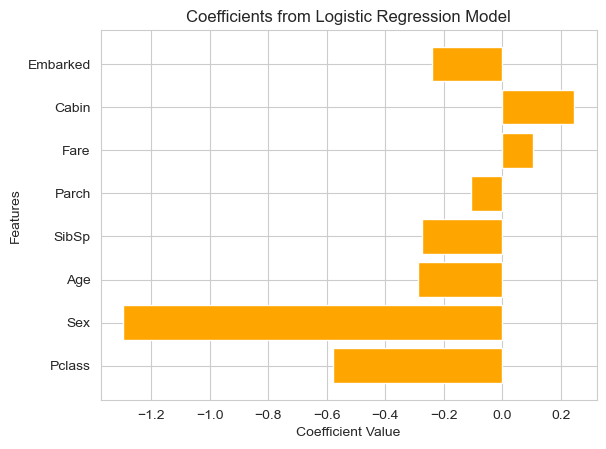

In [647]:
y_pred_prob_3 = model_3.predict_proba(X_test_scaled_3)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_3, y_pred_prob_3)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()


# Get coefficients of the model
feature_importances = model_3.coef_[0]

# Plot coefficients of the model
plt.barh(X_test_scaled_3.columns, feature_importances, color ='Orange' )

# Plot the coefficients
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients from Logistic Regression Model')
plt.show()


## Drop underthresholded features

In [648]:
# Set the threshold for coefficient 
threshold = 0.2

coefficients = model_3.coef_

# Identify features with coefficients less than the threshold
features_to_remove = []
for i in range(len(coefficients[0])):
    if abs(coefficients[0][i]) < threshold:
        features_to_remove.append(X_test_scaled.columns[i])
        
features_to_remove

['Parch', 'Fare']

In [649]:


X_train_4 = X_train_3.drop(features_to_remove, axis=1)
X_test_4 = X_test_3.drop(features_to_remove, axis=1)
X_train_4

,Pclass,Sex,Age,SibSp,Cabin,Embarked
0,3,1,22.0,1,0,2
1,1,0,38.0,1,82,0
2,3,0,26.0,0,0,2
3,1,0,35.0,1,56,2
4,3,1,35.0,0,0,2
...,...,...,...,...,...,...
886,2,1,27.0,0,0,2
887,1,0,19.0,0,31,2
888,3,0,100.0,1,0,2
889,1,1,26.0,0,61,0


The accuracy for the training set is 79.46%
The accuracy for the test set is 79.46%

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       549
           1       0.75      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



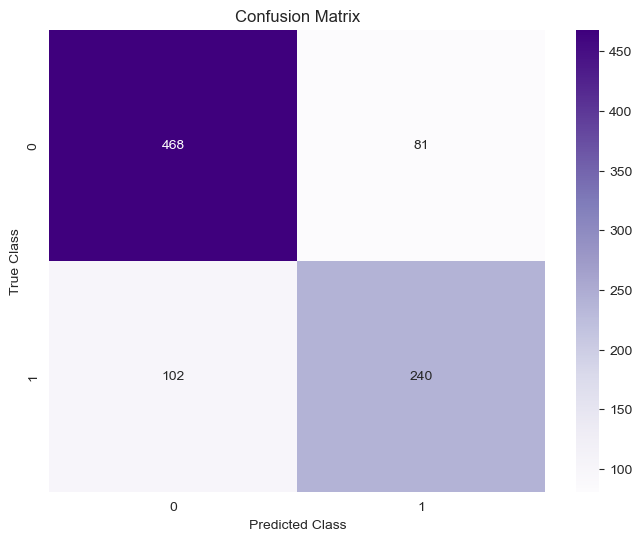

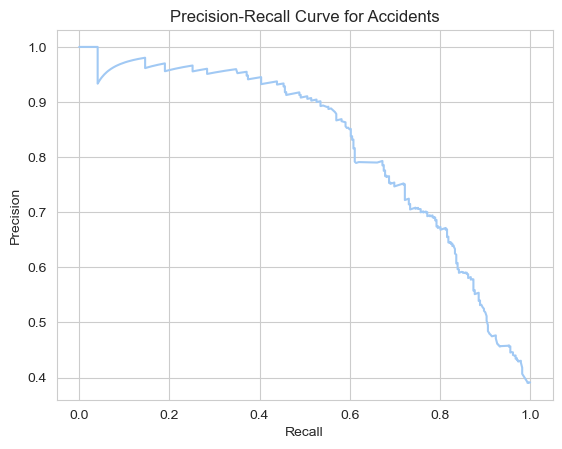

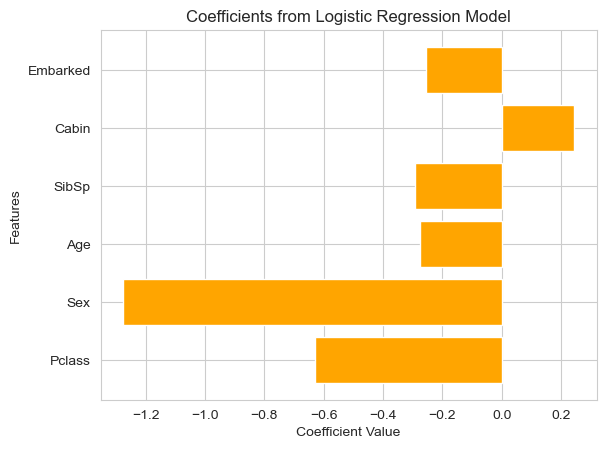

In [650]:
model_4, X_test_scaled_4, y_test_4 = split_and_train(X_train=X_train_4, y_train=y_train_3, X_test=X_test_4, y_test=y_test_3, scale=True)

y_pred_4 = model_4.predict(X_test_scaled_4)

test_report_4 = classification_report(y_test_4, y_pred_4)
test_report_4_dict = classification_report(y_test_4, y_pred_4, output_dict=True)
print(test_report_4)

visualilize_confusion_matrix(y_test_4,y_pred_4)

y_pred_prob_4 = model_4.predict_proba(X_test_scaled_4)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_4, y_pred_prob_4)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()


# Get coefficients of the model
feature_importances = model_4.coef_[0]

# Plot coefficients of the model
plt.barh(X_test_scaled_4.columns, feature_importances, color ='Orange' )

# Plot the coefficients
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Coefficients from Logistic Regression Model')
plt.show()

The accuracy for the training set is 84.96%
The accuracy for the test set is 84.96%

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       549
           1       0.88      0.71      0.78       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.85       891



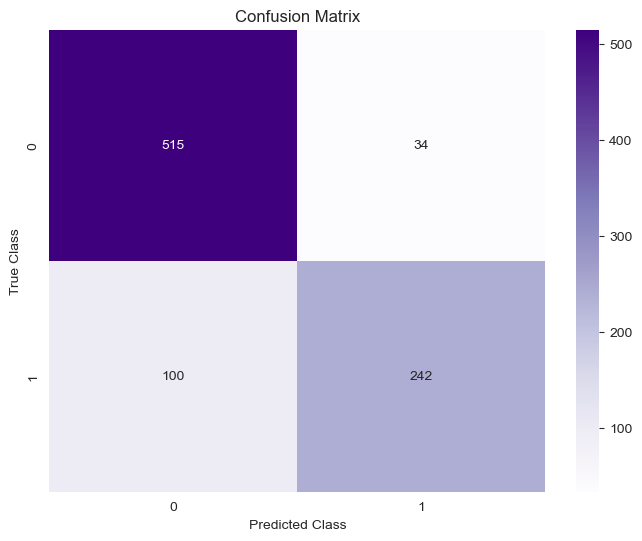

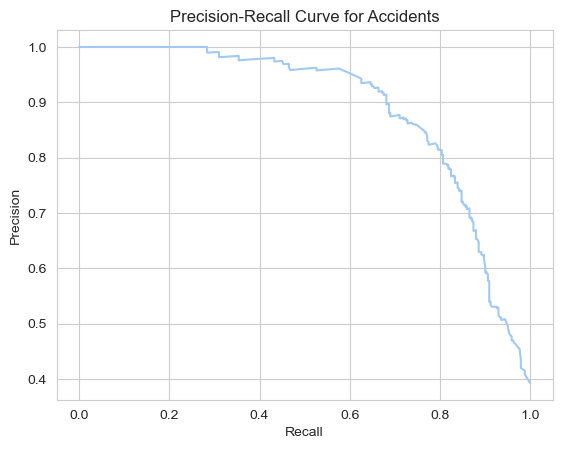

In [651]:
model_5, X_test_scaled_5, y_test_5 = split_and_train(X_train=X_train_4, y_train=y_train_3, X_test=X_test_4, y_test=y_test_3, scale=True, ml_model= "RandomForestClassifier")

y_pred_5 = model_5.predict(X_test_scaled_5)

test_report_5 = classification_report(y_test_5, y_pred_5)
test_report_5_dict = classification_report(y_test_5, y_pred_5, output_dict=True)
print(test_report_5)

visualilize_confusion_matrix(y_test_5,y_pred_5)

y_pred_prob_5 = model_5.predict_proba(X_test_scaled_5)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_5, y_pred_prob_5)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()




The accuracy for the training set is 78.68%
The accuracy for the test set is 78.68%

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       549
           1       0.88      0.71      0.78       342

    accuracy                           0.85       891
   macro avg       0.86      0.82      0.83       891
weighted avg       0.85      0.85      0.85       891



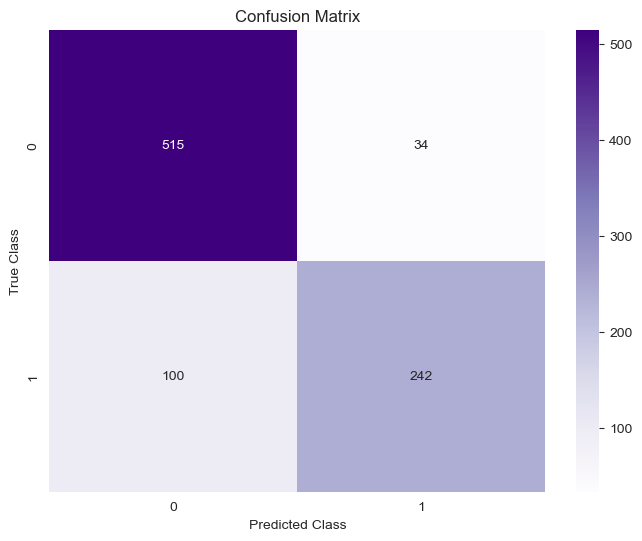

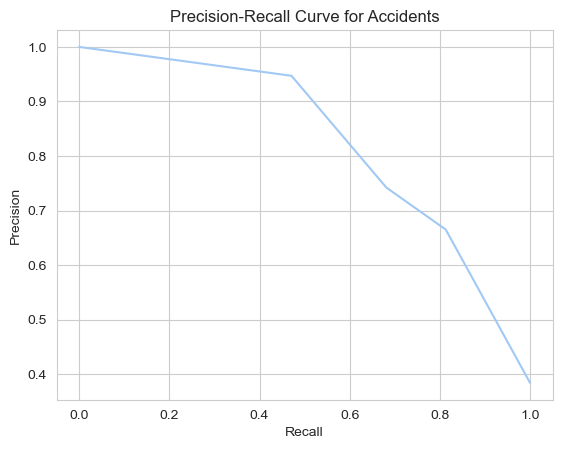

In [652]:
model_6, X_test_scaled_6, y_test_6 = split_and_train(X_train=X_train_4, y_train=y_train_3, X_test=X_test_4, y_test=y_test_3, scale=True, ml_model= "DecisionTreeClassifier")

y_pred_6 = model_5.predict(X_test_scaled_6)

test_report_6 = classification_report(y_test_6, y_pred_6)
test_report_6_dict = classification_report(y_test_6, y_pred_6, output_dict =True)
print(test_report_6)

visualilize_confusion_matrix(y_test_6,y_pred_6)

y_pred_prob_6 = model_6.predict_proba(X_test_scaled_6)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test_6, y_pred_prob_6)  
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Accidents')
plt.show()


[0.6993062859894876, 0.8063627791350564, 0.7974365726456233, 0.7928830856523921, 0.852526680734528, 0.852526680734528]


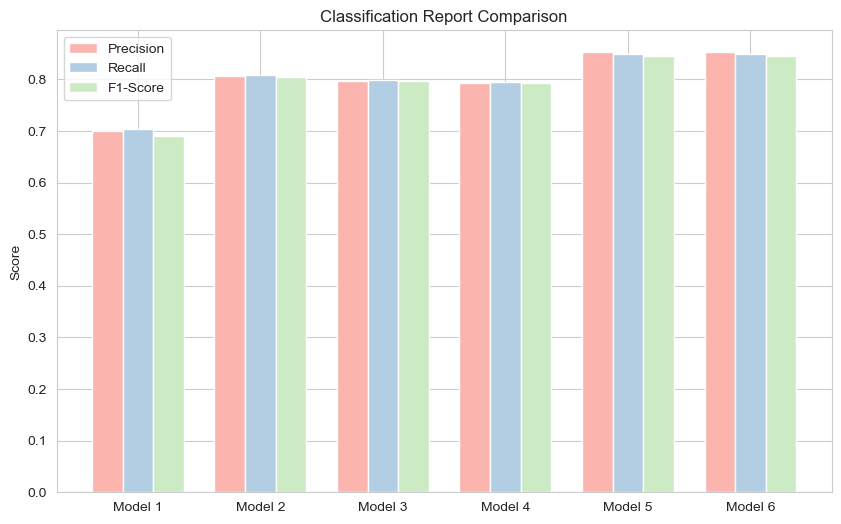

In [653]:
# Save classification reports in a list
test_reports = [test_report_1_dict, test_report_2_dict, test_report_3_dict, test_report_4_dict, test_report_5_dict, test_report_6_dict]

# Initialize lists to store precision, recall, and f1-score for each model
precision = []
recall = []
f1_score = []

# Iterate through the classification reports and extract the necessary metrics
for report in test_reports:
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    f1_score.append(report['weighted avg']['f1-score'])

print(precision)
# Set figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Set color palette
pastel_colors = plt.get_cmap('Pastel1').colors

# Set x axis labels and positions
models = ['Default', 'Encoded', 'Drop+Encoded', 'Drop+Encoded+Threshold', 'RandomFores', 'DecicisonTree']
x_pos = np.arange(len(models))

# Set bar widths
width = 0.25

# Create bar plots for precision, recall, and f1-score
ax.bar(x_pos - width, precision, width, color=pastel_colors[0], label='Precision')
ax.bar(x_pos, recall, width, color=pastel_colors[1], label='Recall')
ax.bar(x_pos + width, f1_score, width, color=pastel_colors[2], label='F1-Score')

# Set y axis label
ax.set_ylabel('Score')

# Set chart title and legend
ax.set_title('Classification Report Comparison')
ax.legend()

# Set x axis tick labels and positions
ax.set_xticks(x_pos)
ax.set_xticklabels(models)

plt.show()